In [1]:
# for automatic reloading
%load_ext autoreload
%autoreload 2

In [4]:
from birdbrain.atlas import atlas
from birdbrain.utils import um_to_vox
from birdbrain.visualization.plotting_2d import plot_2d_coordinates
import numpy as np

In [5]:
dset_dir = '../../data/processed/pigeon/'

pigeon_atlas = atlas(
    species = 'pigeon',
    dset_dir = dset_dir,
    um_mult = 1,
    smoothing = [], #['Brain', 'Brainregions']
)


pigeon.zip: 0.00B [00:00, ?B/s]

patool: Extracting ../../data/raw/pigeon/pigeon.zip ...
patool: running /usr/bin/7z x -o../../data/raw/pigeon/ -- ../../data/raw/pigeon/pigeon.zip
patool: ... ../../data/raw/pigeon/pigeon.zip extracted to `../../data/raw/pigeon/'.
Getting voxel data from .img files...
Getting location for each nucleus/region from voxel data...


Atlas created


In [ ]:
# The T2 voxels in this dataset are not the same as the delineations for some reason... as a temporary fix I just cut off 1 voxel...
pigeon_atlas.voxel_data.loc['T2', 'voxels'] = pigeon_atlas.voxel_data.loc['T2', 'voxels'][:,:,1:]

In [124]:
# all of the different subsets of delineations available 
all_r2p = np.unique(pigeon_atlas.region_vox.type_)
all_r2p

array(['Arcopallium', 'Auditory1', 'Auditory2', 'Olfactory',
       'Somatosensory_spinal_system_and_body_representation',
       'Somatosensory_trigeminal', 'Somatosensory_wulst', 'Visual_aos',
       'Visual_isthmic', 'Visual_thalamofugal', 'Visual_wulst'],
      dtype=object)

#### The pigeon default zero point is not the y sinus

{'medial-lateral': 0, 'anterior-posterior': 0, 'dorsal-ventral': 0}


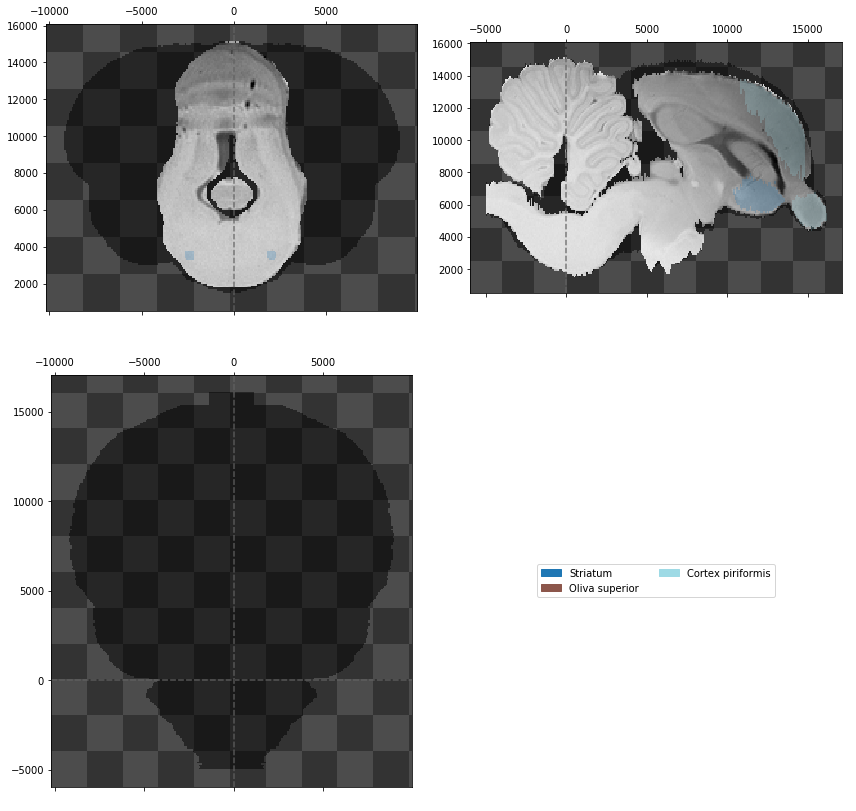

In [123]:
plot_2d_coordinates(pigeon_atlas, point_in_um= [0,0,0], regions_to_plot=all_r2p,brain_masked_image='T2');

{'medial-lateral': 0, 'anterior-posterior': 0, 'dorsal-ventral': 0}
[129  79  22]
12360583 5261590 6953382


/mnt/cube/tsainbur/Projects/github_repos/birdbrain/birdbrain/visualization/plotting_2d.py:268: RuntimeWarning: invalid value encountered in power
  ax.matshow(np.rot90(img ** 0.5), cmap=atlas.img_cmap[::-1], extent=img_bg_extent_ax)


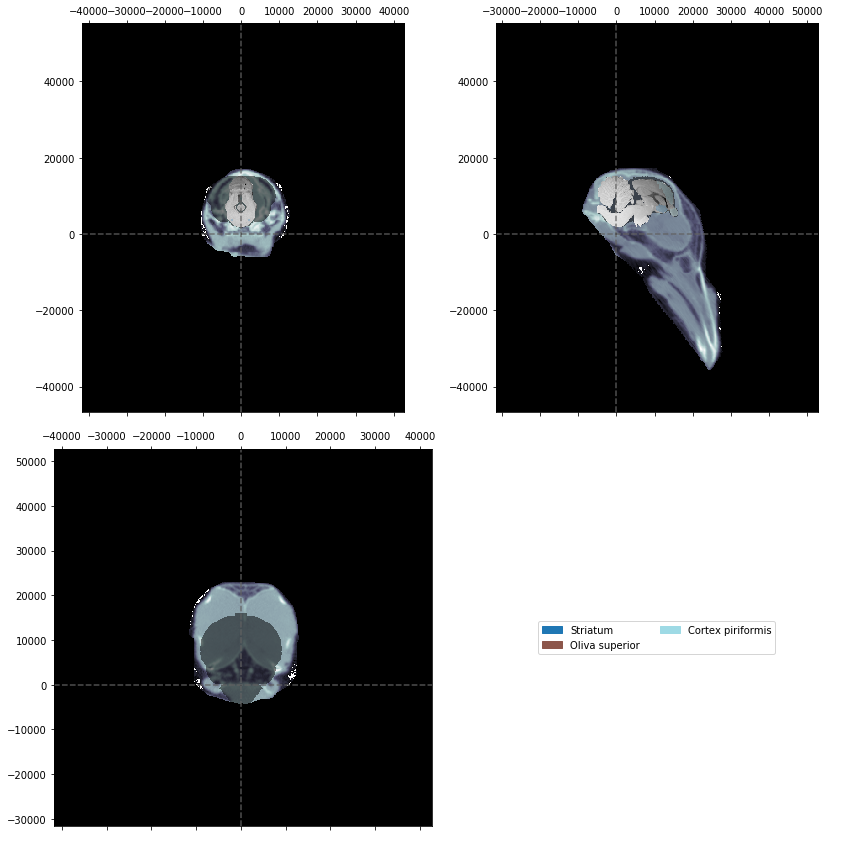

In [122]:
plot_2d_coordinates(pigeon_atlas, point_in_um= [0,0,0], regions_to_plot=all_r2p, brain_masked_image='T2', bg_image= 'Ct');